In [874]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import pandas as pd

In [875]:
import pywt
import glob
from scipy.special import expit
from tqdm.notebook import tqdm_notebook

In [1608]:
#custom cmap
import matplotlib.colors

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Wavelet transformed

In [876]:
path_to_data = './cropped'

In [877]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [878]:
data_sports = dict()

In [879]:
for title in img_dirs:
  name = title.split('/')[-1]
  files_img = glob.glob(f"{title}/*")
  data_sports[name] = files_img

In [880]:
data_sports = pd.DataFrame.from_dict(data_sports, orient='index').T

In [884]:
colors = []
for i in range(3):
    colors.append(plt.get_cmap('viridis')(np.random.uniform(0.0,1.0,1)[0]))

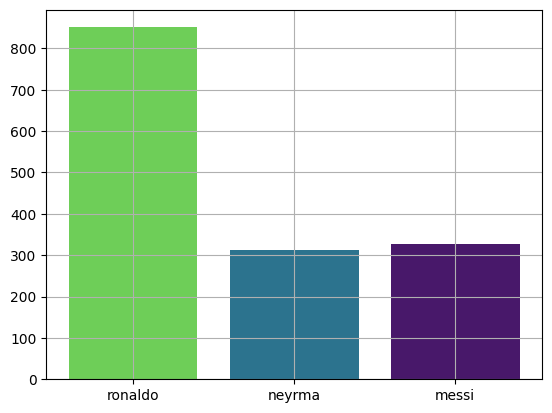

In [1707]:
fig, ax = plt.subplots()
ax.bar(title , data_sports.count().values,0.8, color=colors)
plt.grid()
plt.show()

In [886]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [887]:
data_sports['ronaldo']

0      ./cropped/ronaldo/ronaldo340.png
1      ./cropped/ronaldo/ronaldo426.png
2      ./cropped/ronaldo/ronaldo432.png
3      ./cropped/ronaldo/ronaldo354.png
4      ./cropped/ronaldo/ronaldo368.png
                     ...               
846    ./cropped/ronaldo/ronaldo371.png
847    ./cropped/ronaldo/ronaldo417.png
848    ./cropped/ronaldo/ronaldo403.png
849    ./cropped/ronaldo/ronaldo365.png
850    ./cropped/ronaldo/ronaldo359.png
Name: ronaldo, Length: 851, dtype: object

/var/folders/1w/f0nqcy4j11bg0lwxbf6rg_jr0000gn/T/ipykernel_2377/3552940320.py:19: RuntimeWarning: invalid value encountered in cast
  imArray_H =  np.uint8(imArray_H)


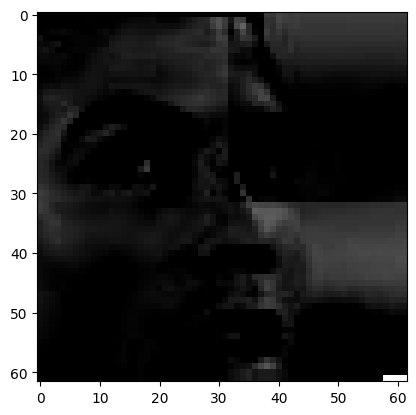

In [1702]:
test_img =cv2.imread(data_sports['ronaldo'][11])
im_har = w2d(test_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [889]:
X,Y = [], []
for celebrity_name, training_files in data_sports.items():
  for training_image in training_files:
    try:
      img = cv2.imread(training_image)
      scalled_raw_img = cv2.resize(img, (32, 32))
      img_har = w2d(img,'db1',5)
      scalled_img_har = cv2.resize(img_har, (32, 32))
      # scalled_img_har = np.array(scalled_img_har)
      combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
      combined_img = combined_img / 255
    except Exception as e:
      print(str(e))
    X.append(list(combined_img.flatten()))
    Y.append(celebrity_name)

/var/folders/1w/f0nqcy4j11bg0lwxbf6rg_jr0000gn/T/ipykernel_2377/3552940320.py:19: RuntimeWarning: invalid value encountered in cast
  imArray_H =  np.uint8(imArray_H)
[ WARN:0@34538.591] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34538.594] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34538.594] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34538.594] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34538.594] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34538.594] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34538.594] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34538

OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.1) /Users/xper

[ WARN:0@34539.063] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34539.064] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34539.064] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34539.064] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34539.064] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34539.064] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34539.064] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34539.064] global loadsave.cpp:248 findDecoder imread_(''): can't open/read file: check file path/integrity
[ WARN:0@34539.065] global loadsave.cpp:248 findDecoder imread_(

In [890]:
X = np.array(X)

In [891]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [892]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi nhãn hành dạng số
Y = label_encoder.fit_transform(Y)


In [893]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [894]:
y_train_decoded = label_encoder.inverse_transform(y_train)
y_test_decoded = label_encoder.inverse_transform(y_test)

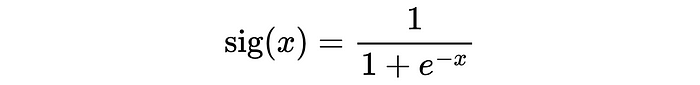 <br />
## The derivation is:<br />
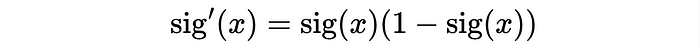

In [895]:
def sigmoid_prime(z):
    sg = sigmoid(z)
    return sg * (1 - sg)
def sigmoid(z):
    return expit(z)

$$L2_{reg} = \lambda/2 * (||w1||^2_2 + ||w2||^2_2)$$
$$L1_{reg} = \lambda/2 * (||w1||_1 + ||w2||_1)$$
$$\text{CE}(y, \hat{y}) = -\sum_{i=1}^n y_i \log(\hat{y}_i)$$
Giảm thiếu overfit 

In [1703]:
def L2_reg(lambda_, w1, w2):
    return (lambda_ / 2.0) * (np.sum(w1 ** 2) + np.sum(w2 ** 2))


def L1_reg(lambda_, w1, w2):
    return (lambda_ / 2.0) * (np.abs(w1).sum() + np.abs(w2).sum())


def cross_entropy(outputs, y_target):
    return -np.sum(np.log(outputs) * y_target, axis=1)

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{sigmoid}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{sigmoid}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$



$$argmax(y) = \underset{i}{\text{argmax}} \ y_i$$

In [897]:
def mle(y, axis=1):
    return np.argmax(y, 1)

In [898]:
def softmax(x):
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores)

## **He initialization** <br /> 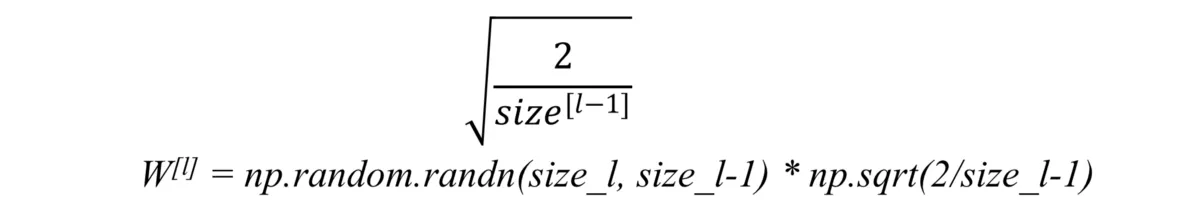

## **Xavier initialization:** <br />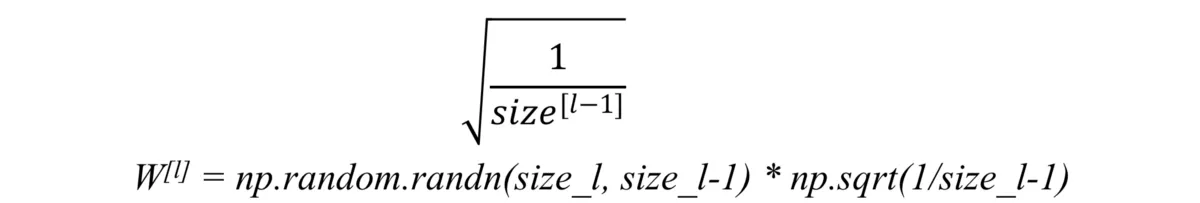

In [1540]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(hidden_size, input_size) *  np.sqrt( 2/ input_size )
    b1 = np.random.randn(hidden_size, 1) *  np.sqrt( 1 / input_size )
    W2 = np.random.randn(output_size, hidden_size) *  np.sqrt( 2/ input_size )
    b2 = np.random.randn(output_size, 1) *  np.sqrt( 1 / input_size )
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [1497]:
def forward_propagation(X, parameters):
    # retrieve the parameters
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    
    # compute the activation of the hidden layer
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    
    # compute the activation of the output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

In [1322]:
# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y
def one_hot(y, n_labels):
    mat = np.zeros((len(y), n_labels))
    for i, val in enumerate(y):
        mat[i, val] = 1
    return mat

In [1499]:
def backward_propagation(parameters, cache, X, y, n_classes):
    m = len(X)
    
    # retrieve the intermediate values
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    dZ2 = A2 - y.T
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = parameters['W2'].T.dot(dZ2) * sigmoid_prime(Z1)
    dW1 = 1/ m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1)
        # one_hot_Y = one_hot(y,n_classes)
    # dZ2 = A2 - y
    # dW2 = 1 / m * dZ2.dot(A1.T)
    # db2 = 1 / m * np.sum(dZ2)
    # # print(Z1.shape)
    # print(dZ2.shape, parameters['W2'].shape)
    # dZ1 = dZ2.T.dot(parameters['W2']) * sigmoid_prime(Z1)
    # # 
    # # * ReLU_deriv(Z1)
    # print(X)
    # dW1 = 1 / m * dZ1.dot(X)
   
    # db1 = 1 / m * np.sum(dZ1)
    

    gradients = {"dW1": dW1 , "db1": db1 , "dW2":dW2 , "db2": db2 }

    return gradients

In [1317]:
# update parameters
def update_parameters(parameters, gradients, learning_rate):
    # retrieve the gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    # retrieve the weights and biases
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # update the weights and biases
  
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters


In [1705]:
def compute_loss(A2, Y):
    m = Y.shape[0] # number of examples
    # compute loss
    loss = np.sum((A2 - Y) ** 2) / (2 * m)
    
    return loss

In [1704]:
def cross_entropy(label,pred):
    yl = np.multiply(pred.T,label)
    yl = yl[yl!=0]
    yl = -np.log(yl)
    yl = np.mean(yl)
    return yl
  

In [1715]:
def train(X, y,  num_iterations, learning_rate,  n_classes=32*32 ,  n_hidden_units=10, n_batches = 25 ):
    # initialize the weights and biases
    parameters = initialize_parameters(X.shape[1] , n_hidden_units   , n_classes)
    errros = []
    # y_data_enc = one_hot(y, n_classes)
    X_data, y_data = X.copy(), y.copy()
    y_data_enc = one_hot(y_data, n_classes)
            
    X_mbs = np.array_split(X_data, n_batches)
    y_mbs = np.array_split(y_data_enc, n_batches)
    for i in tqdm_notebook(range(num_iterations)):
        epoch_errors = []
        
        for Xi, yi in zip(X_mbs, y_mbs):
            # forward propagation
            A2, cache = forward_propagation(Xi, parameters)
            # backward propagation

            gradients = backward_propagation(parameters, cache, Xi , yi, n_classes)
            # update the parameters
            parameters = update_parameters(parameters, gradients, learning_rate)
                
            loss = cross_entropy(yi,A2)
            epoch_errors.append(loss) 
        errros.append(np.mean(epoch_errors))
    
    plt.plot(range(len(errros)), errros)
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    plt.show()
    return parameters

  0%|          | 0/10000 [00:00<?, ?it/s]

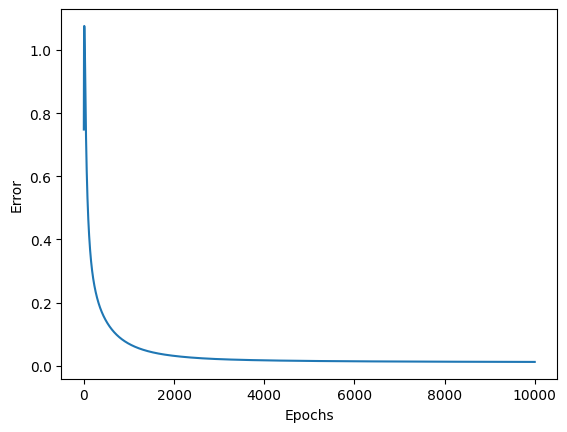

In [1716]:
parameters = train(X_train, y_train,num_iterations=10000, learning_rate=0.009, n_hidden_units=10, n_classes=3)

In [1717]:
CLASS_NAMES = [ 'messi', 'neyrma','ronaldo']

In [1718]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[:32*32*3].reshape(32, 32, 3))

  predicted_label = np.argmax(predictions_array, 0)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} label({})".format(CLASS_NAMES[predicted_label],
                                CLASS_NAMES[true_label]),
                                color=color)
  
  
def plot_image_grid(X_test, y_test, y_hat, num_rows=5, num_cols=3):
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_hat, y_test, X_test)

In [1518]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [1553]:
def predict(X, parameters):
   A2 , _ = forward_propagation(X, parameters)
   return A2.T

In [1688]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [1719]:
predict_test = predict(X_test,parameters)

In [1720]:
index_predict = get_predictions(predict_test.T)
get_accuracy(index_predict,y_test)

0.92018779342723

In [1721]:
A2 , _ = forward_propagation(X_train,parameters)
predict_label = get_predictions(A2)

In [1722]:
get_accuracy(predict_label,y_train)

0.9937304075235109

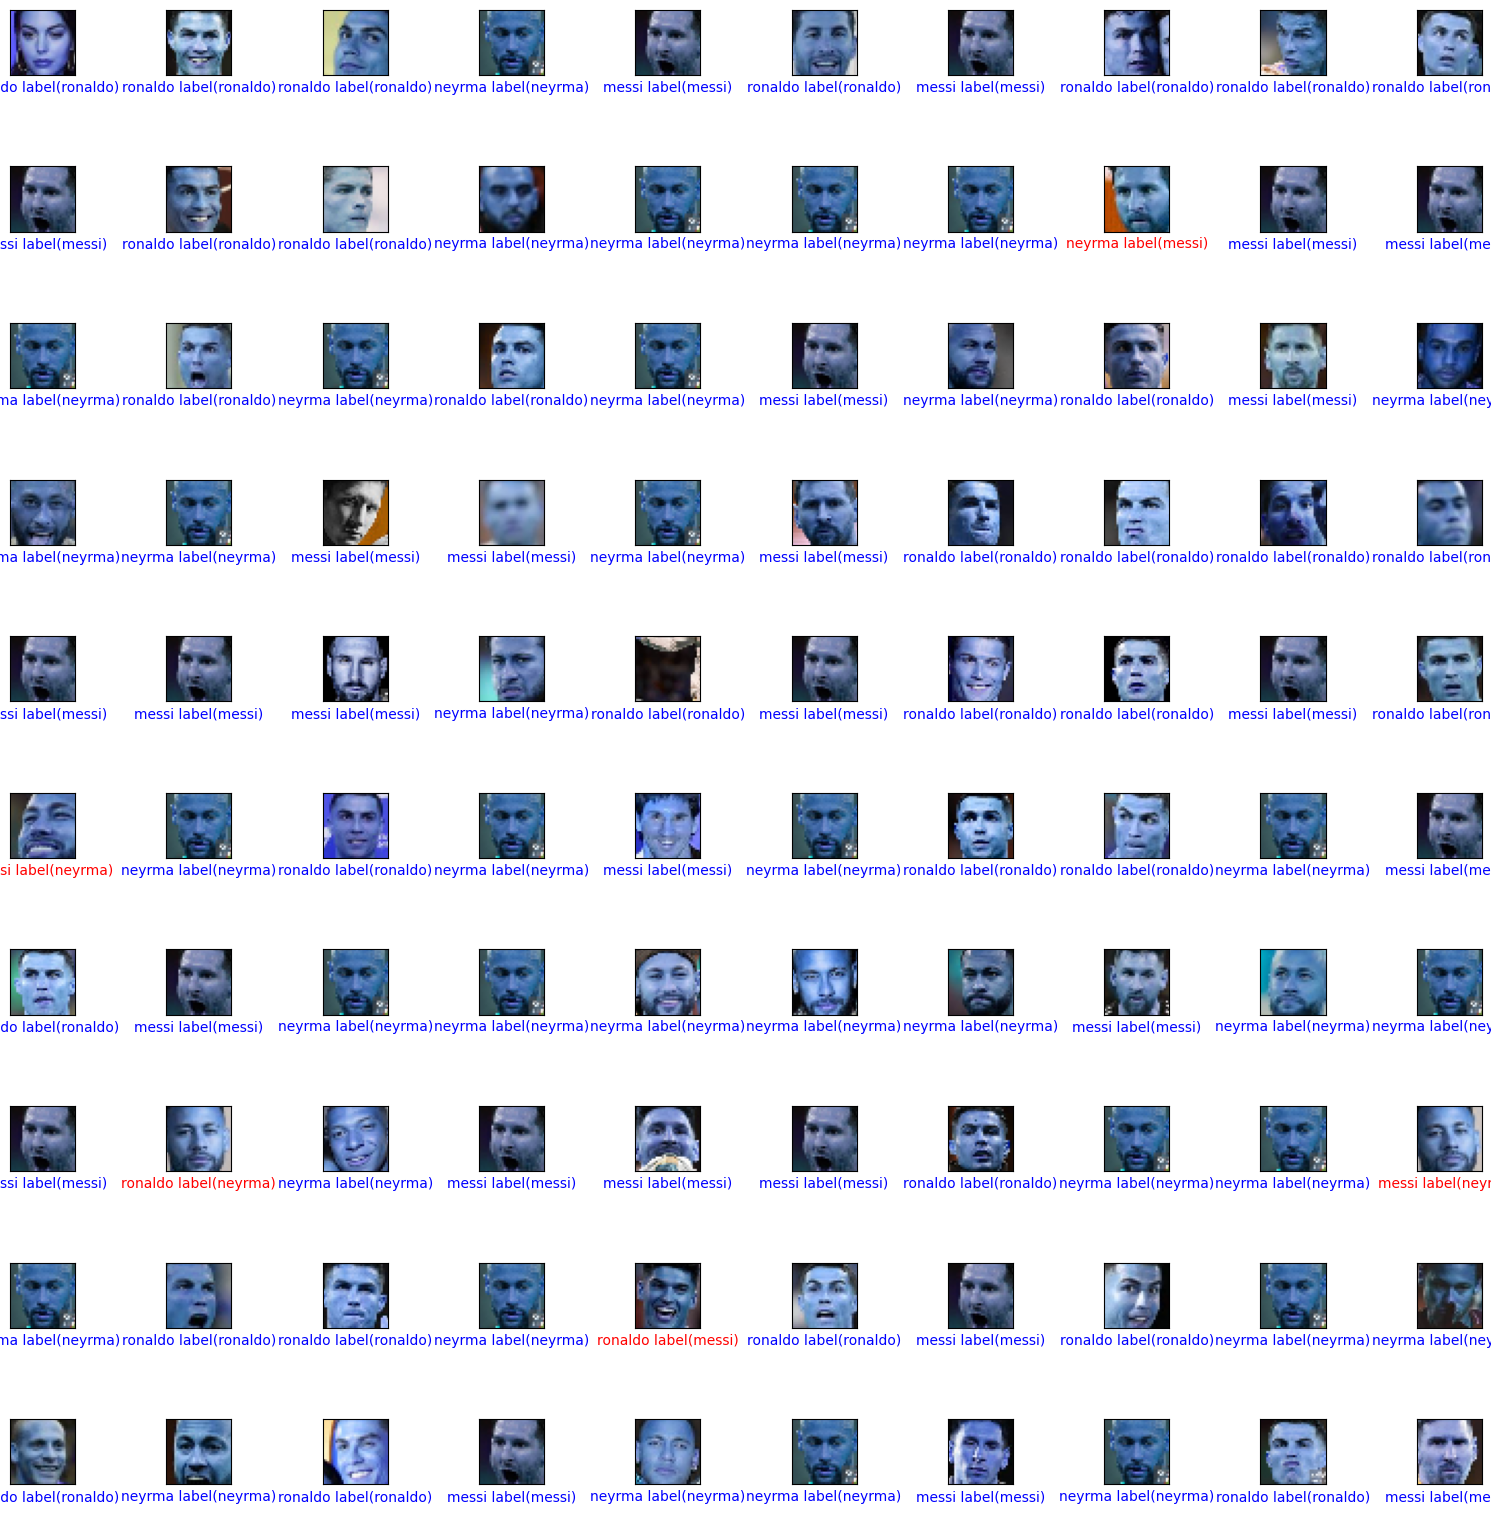

In [1735]:
plot_image_grid(X_test, y_test, predict_test, 10, 10)

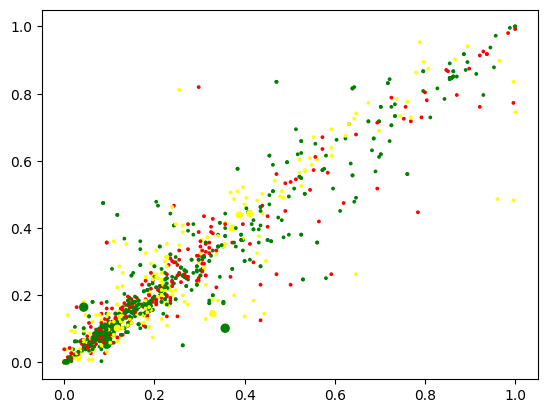

In [1728]:
plt.scatter(X_train[:,0], X_train[:,1], c=predict_label, cmap=my_cmap, s=15*(np.abs(predict_label-y_train)+.2))
plt.show()

In [1729]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [1730]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [1731]:
def test_img(url_img, parameters,index_name ):
   cropped_image = get_cropped_image_if_2_eyes(url_img)
   scalled_raw_img = cv2.resize(cropped_image, (32, 32))
   img_har = w2d(cropped_image,'db1',5)
   scalled_img_har = cv2.resize(img_har, (32, 32))
   combined_img =  np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
   combined_img = combined_img / 255 
   test_img = np.array([list(combined_img.flatten())])
   y_hat  = predict(test_img, parameters)
   plot_image(0, y_hat,[index_name], test_img)

/var/folders/1w/f0nqcy4j11bg0lwxbf6rg_jr0000gn/T/ipykernel_2377/3552940320.py:19: RuntimeWarning: invalid value encountered in cast
  imArray_H =  np.uint8(imArray_H)


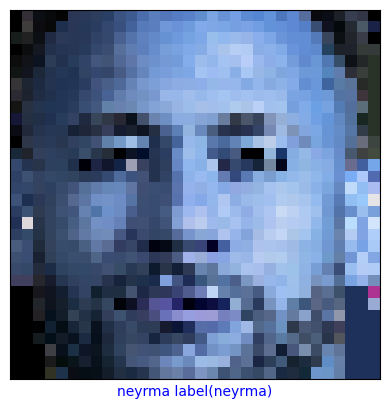

In [1584]:
test_img('./neyrma.webp', parameters, 1)

/var/folders/1w/f0nqcy4j11bg0lwxbf6rg_jr0000gn/T/ipykernel_2377/3552940320.py:19: RuntimeWarning: invalid value encountered in cast
  imArray_H =  np.uint8(imArray_H)


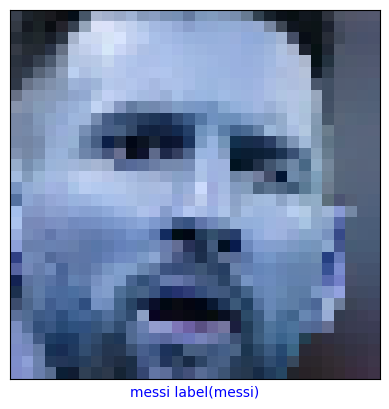

In [1585]:
test_img('./messi.webp', parameters, 0)

In [1592]:
def one_hot(y, n_labels):
    mat = np.zeros((len(y), n_labels))
    for i, val in enumerate(y):
        mat[i, val] = 1
    return mat

Input layer:

$$net_{input} = X$$

Hidden layer:

$$net_{hidden} = w_1 \cdot net_{input}^T$$

$$act_{hidden} = \sigma(net_{hidden})$$

Output layer:

$$net_{out} = w_2 \cdot act_{hidden}$$

$$act_{out} = \sigma(net_{out})$$

 # **Back propagation**


$$ \sigma_3 = act_{out} - y$$


$$\sigma_2 = (w_2^T \cdot \sigma_3) \odot \sigma'(net_{hidden})$$

$$ grad_1 = \sigma_2 \cdot net_{input}^T $$

$$ grad_2 = \sigma_3 \cdot act_{hidden}^T $$


$$ grad_1 += (w_1 \cdot (l_1 + l_2))$$

$$ grad_2 += (w_2 \cdot (l_1 + l_2)) $$

In [1732]:
def cross_entropy(label,pred):
    yl = np.multiply(pred,label)
    yl = yl[yl!=0]
    yl = -np.log(yl)
    yl = np.mean(yl)
    return yl

In [1593]:
class NNClassifier:

    def __init__(self, n_classes, n_features, n_hidden_units=30,
                 l1=0.0, l2=0.0, epochs=500, learning_rate=0.01,
                 n_batches=1, random_seed=None):

        if random_seed:
            np.random.seed(random_seed)
        self.n_classes = n_classes
        self.n_features = n_features
        self.n_hidden_units = n_hidden_units
        self.w1, self.w2 = self._init_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.n_batches = n_batches

    def _init_weights(self):
        w1 = np.random.uniform(-1.0, 1.0,
                               size=(self.n_hidden_units, self.n_features))   
   
        w2 = np.random.uniform(-1.0, 1.0,
                               size=(self.n_classes, self.n_hidden_units))    
        return w1, w2
      
    def _forward(self, X):
        net_input = X.copy()
        net_hidden = self.w1.dot(net_input.T)
        act_hidden = sigmoid(net_hidden)
        net_out = self.w2.dot(act_hidden)
        act_out = sigmoid(net_out)
        return net_input, net_hidden, act_hidden, net_out, act_out
    
    def _backward(self, net_input, net_hidden, act_hidden, act_out, y):
        sigma3 = act_out - y
        sigma2 = self.w2.T.dot(sigma3) * sigmoid_prime(net_hidden)
        # print(sigma2.shape, net_input.shape )
        grad1 = sigma2.dot(net_input)
        grad2 = sigma3.dot(act_hidden.T)
        return grad1, grad2      

    def _error(self, y, output):
        L1_term = L1_reg(self.l1, self.w1, self.w2)
        L2_term = L2_reg(self.l2, self.w1, self.w2)
        error = cross_entropy(output, y) + L1_term + L2_term
        return 0.5 * np.mean(error)
     
    def _backprop_step(self, X, y):
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(X)
        y = y.T

        grad1, grad2 = self._backward(net_input, net_hidden, act_hidden, act_out, y)

        # regularize
        grad1 += (self.w1 * (self.l1 + self.l2))
        grad2 += (self.w2 * (self.l1 + self.l2))

        error = self._error(y, act_out)
        
        return error, grad1, grad2

    def predict(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return mle(net_out.T)
    
    def predict_proba(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return softmax(act_out.T)

    def fit(self, X, y):
        self.error_ = []
        X_data, y_data = X.copy(), y.copy()
        y_data_enc = one_hot(y_data, self.n_classes)
                
        X_mbs = np.array_split(X_data, self.n_batches)
        y_mbs = np.array_split(y_data_enc, self.n_batches)
        
        for i in tqdm_notebook(range(self.epochs)):
            
            epoch_errors = []

            for Xi, yi in zip(X_mbs, y_mbs):
                # update weights
                error, grad1, grad2 = self._backprop_step(Xi, yi)
                epoch_errors.append(error)
                self.w1 -= (self.learning_rate * grad1)
                self.w2 -= (self.learning_rate * grad2)
            self.error_.append(np.mean(epoch_errors))
        return self
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.sum(y == y_hat, axis=0) / float(X.shape[0])

In [126]:
def plot_error(model):
    plt.plot(range(len(model.error_)), model.error_)
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    plt.show()

In [1734]:
nn = NNClassifier(
    n_classes= 3 , 
    n_features=4096  ,
    n_hidden_units=10,
    l2=0.5,
    l1=0.0,
    epochs=10000,
    learning_rate=0.001,
    n_batches=25,
    random_seed=42
).fit(X_train, y_train)

(10, 4096) (3, 10)


  0%|          | 0/10000 [00:00<?, ?it/s]

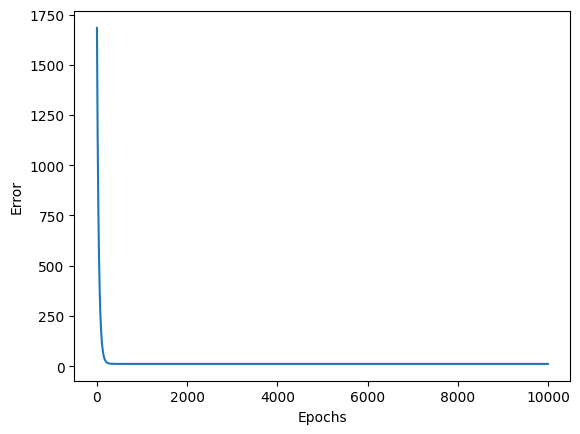

In [1739]:
plot_error(nn)

In [1740]:
print('Train Accuracy: %.2f%%' % (nn.score(X_train, y_train) * 100))
print('Test Accuracy: %.2f%%' % (nn.score(X_test, y_test) * 100))

Train Accuracy: 96.50%
Test Accuracy: 89.51%


In [1741]:
y_hat = nn.predict_proba(X_test)

In [1742]:
Y_pred_binarised_train = nn.predict(X_test)

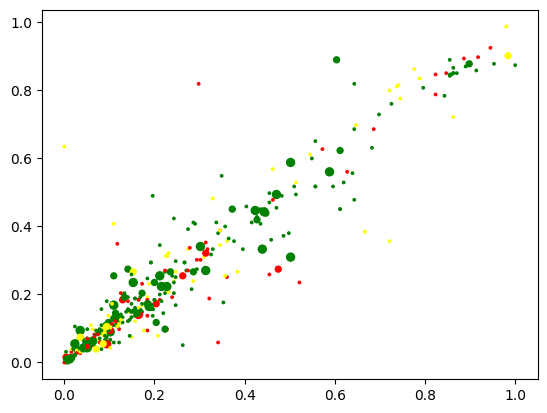

In [1743]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-y_test)+.2))
plt.show()

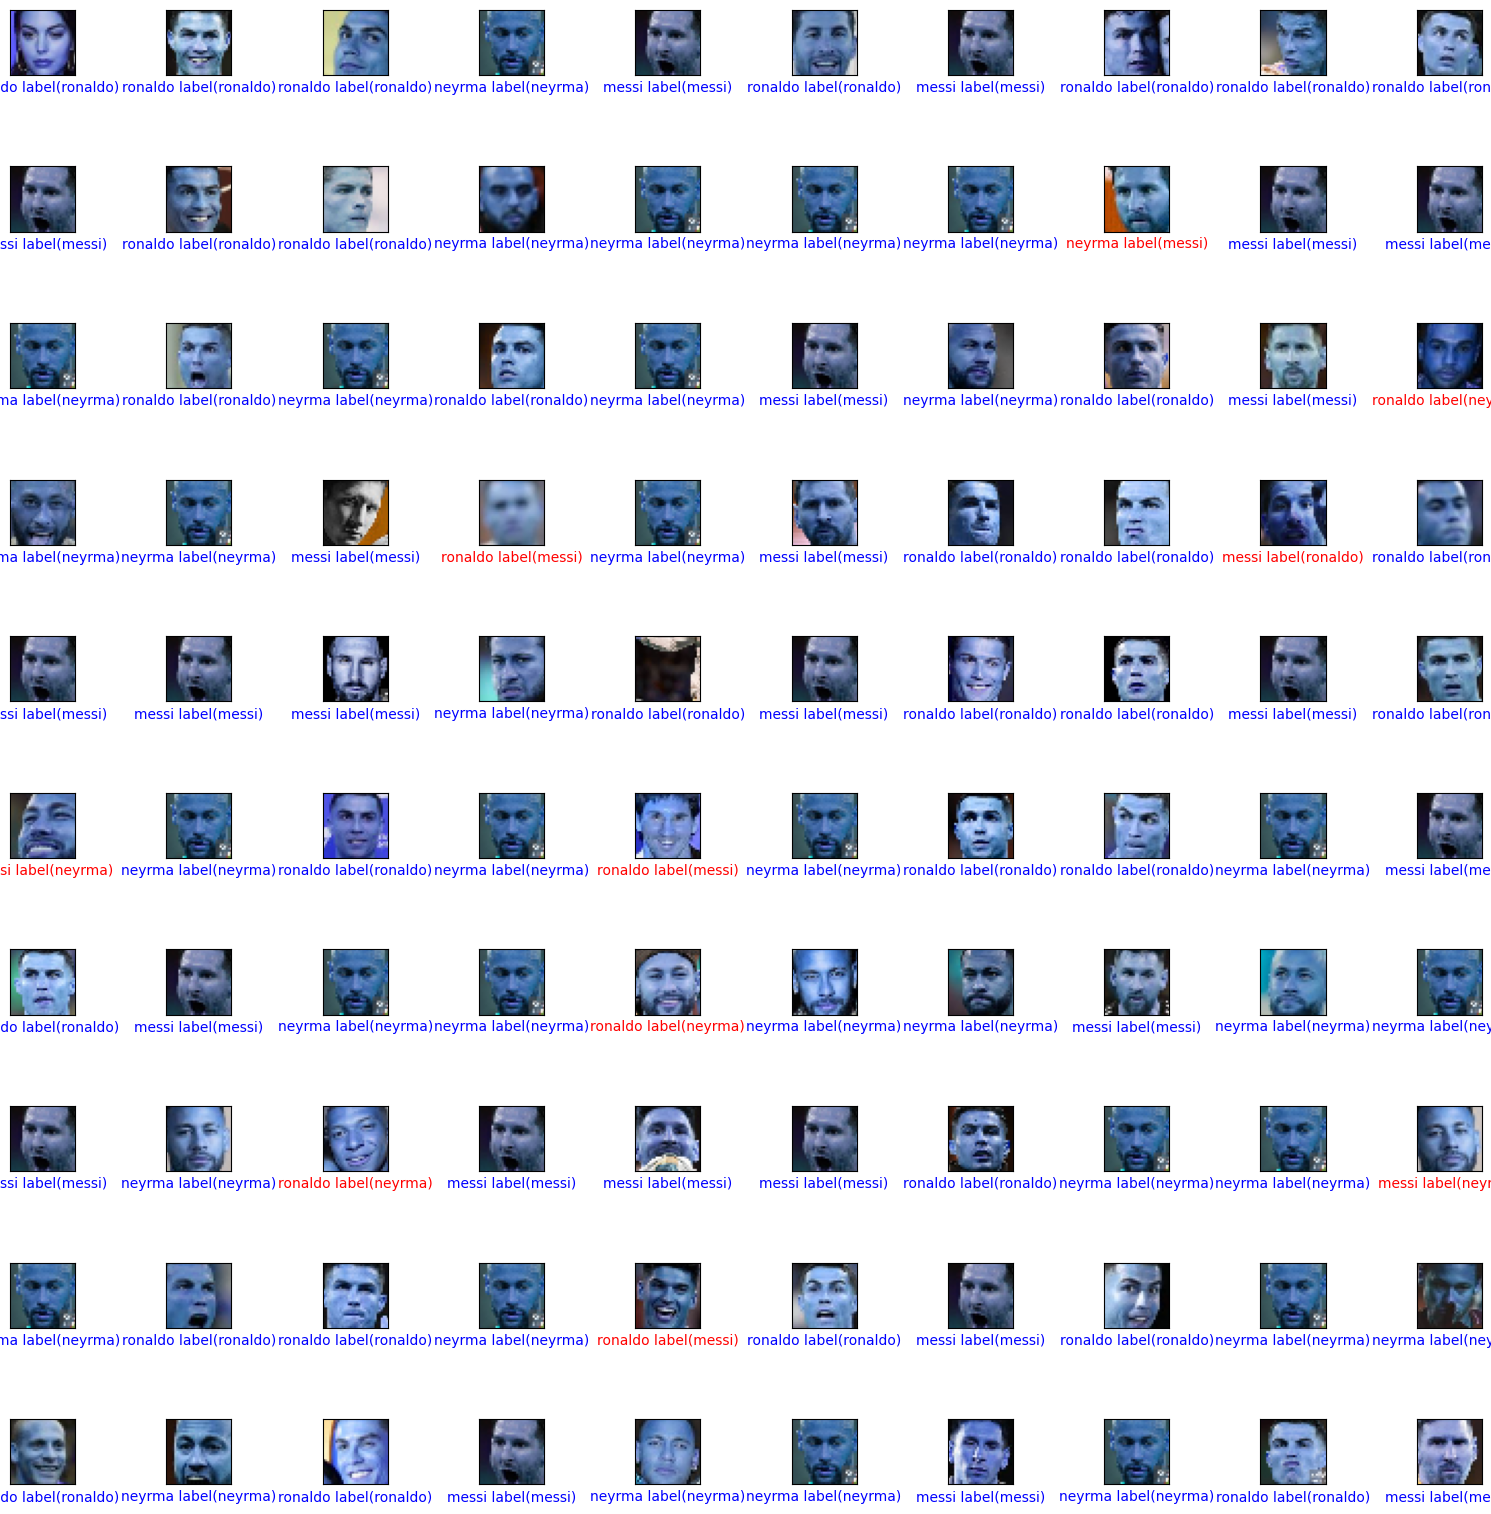

In [1744]:
plot_image_grid(X_test, y_test, y_hat, 10, 10)

In [1764]:
import pickle

In [1765]:
filename = 'finalized_model.sav'
pickle.dump(nn, open(filename, 'wb'))

In [1767]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

0.8951486697965572


In [981]:
from sklearn.preprocessing import OneHotEncoder

In [1745]:
enc = OneHotEncoder()
y_OH_train = enc.fit_transform(np.expand_dims(y_train,1)).toarray()

In [987]:
class FFSN_MultiClass:
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

  0%|          | 0/500 [00:00<?, ?epoch/s]

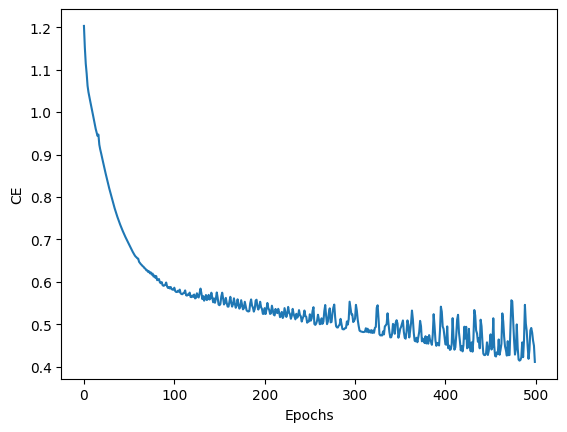

In [1804]:
ffsn_multi = FFSN_MultiClass(4096,3 ,[3,3])
ffsn_multi.fit(X_train,y_OH_train,epochs=500,learning_rate=3,display_loss=True)

  0%|          | 0/600 [00:00<?, ?epoch/s]

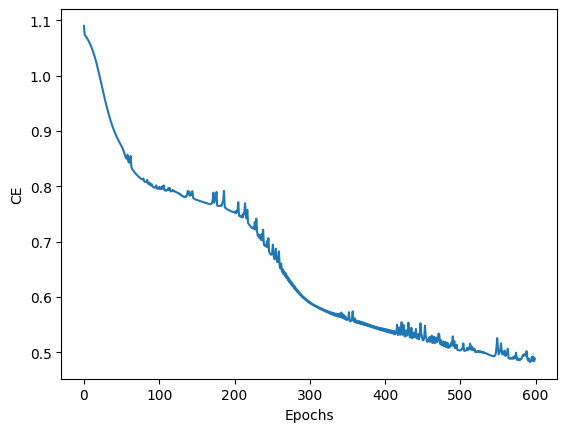

In [1815]:
ffsn_multi_2 = FFSN_MultiClass(4096,3 ,[3,3])
ffsn_multi_2.fit(X_train,y_OH_train,epochs=600,learning_rate=2.5,display_loss=True)

In [1816]:
Y_pred_val_2 = ffsn_multi_2.predict(X_test)
Y_pred_val_2 = np.argmax(Y_pred_val_2,1)
get_accuracy(Y_pred_val_2,y_test)

0.7762128325508607

In [1805]:
Y_pred_val = ffsn_multi.predict(X_test)
Y_pred_val = np.argmax(Y_pred_val,1)

In [1806]:
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

In [1807]:
get_accuracy(Y_pred_train,y_train)

0.8636363636363636

In [1808]:
get_accuracy(Y_pred_val,y_test)

0.7965571205007824

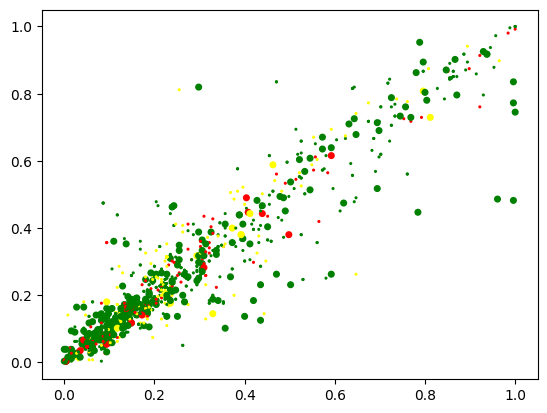

In [1817]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-y_train))+.1))
plt.show()